<a href="https://colab.research.google.com/github/parichayportfolio/FORE_BDA/blob/main/simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [2]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/deeplearning/"


In [7]:
# 2.2
data = pd.read_csv(path + "fashion_mnist_train.csv")

In [8]:
# 2.2.1
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 2.2.2
data.shape

(60000, 785)

In [10]:
# 2.3 Pop out target
y = data.pop('label')

In [11]:
# 2.3.1
data.shape

(60000, 784)

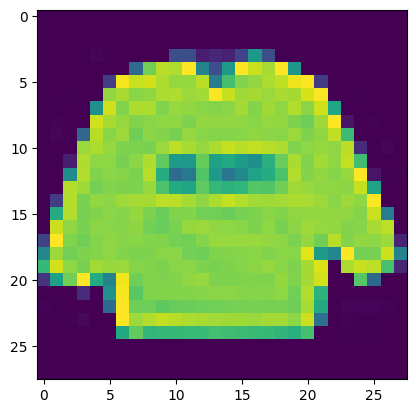

In [12]:
# 3.0
plt.imshow(data.iloc[0,:].values.reshape(28,28));

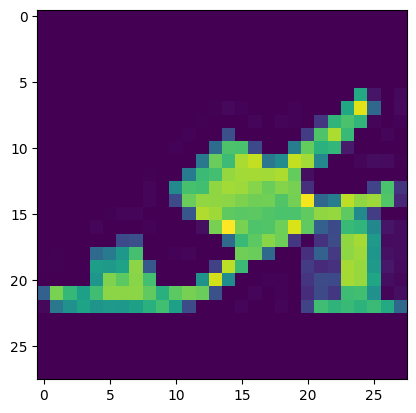

In [13]:
# 3.0
plt.imshow(data.iloc[50,:].values.reshape(28,28));

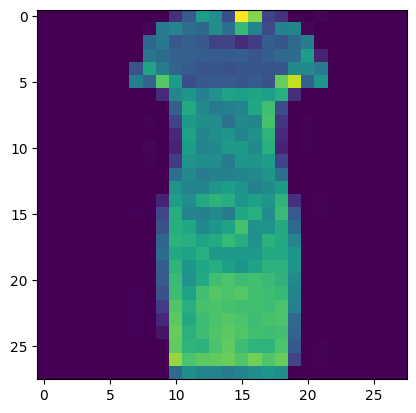

In [14]:
# 3.0
plt.imshow(data.iloc[95,:].values.reshape(28,28));

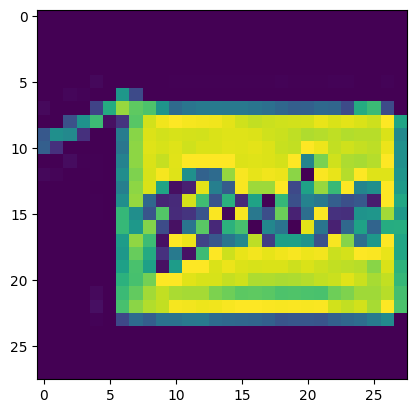

In [15]:
# 3.0
plt.imshow(data.iloc[500,:].values.reshape(28,28));

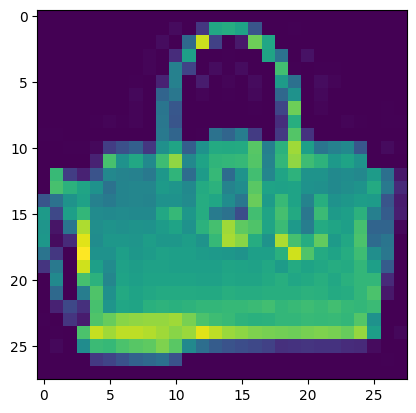

In [16]:
# 3.0
plt.imshow(data.iloc[9634,:].values.reshape(28,28));

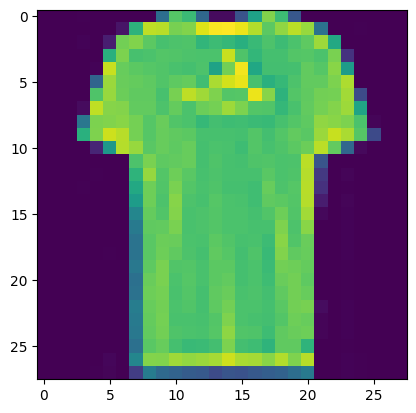

In [17]:
# 3.0
plt.imshow(data.iloc[40000,:].values.reshape(28,28));

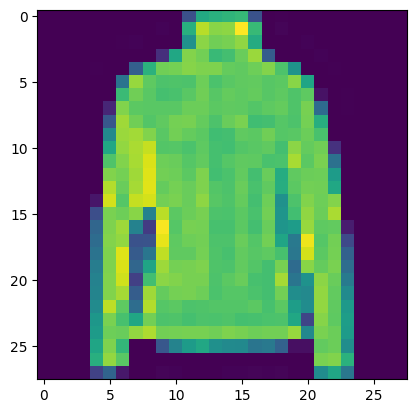

In [18]:
# 3.0
plt.imshow(data.iloc[55,:].values.reshape(28,28));

In [23]:

y.nunique()

10

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [31]:
X_train.shape

(45000, 784)

In [32]:
X_test.shape

(15000, 784)

In [33]:
# 4.0
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [34]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [38]:
mx = tf.keras.Sequential()

In [42]:
mx.add(tf.keras.layers.Input(shape=[784]))

In [43]:
mx.add(tf.keras.layers.Dense(500, activation = 'relu'))

In [47]:
mx.add(tf.keras.layers.Dense(200, activation = 'relu'))

In [48]:
# whenever there are more than 2 outputs, use softmax activation function

In [49]:
mx.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [50]:
mx.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
 dense_2 (Dense)             (None, 200)               2200      
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 401,720
Trainable params: 401,720
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 5.5 Compile model
mx.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
mx.fit(X_train,y_train, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 13s 8ms/step - loss: 1.0383 - accuracy: 0.5371
Epoch 2/100
1407/1407 [==============================] - 12s 9ms/step - loss: 0.7684 - accuracy: 0.6670
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7027 - accuracy: 0.7118
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6775 - accuracy: 0.7211
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6522 - accuracy: 0.7285
Epoch 6/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.6380 - accuracy: 0.7325
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6215 - accuracy: 0.7406
Epoch 8/100
1407/1407 [==============================] - 11s 7ms/step - loss: 0.5951 - accuracy: 0.7693
Epoch 9/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5732 - accuracy: 0.7760
Epoch 10/100
1407/1407 [==============================] - 11s 8ms/step - los

In [ ]:
# 3.1
data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 4.1
df.shape

(60000, 784)

In [ ]:
# 4.2
np.round(df[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

## Model

In [ ]:
# 5.0
model = tf.keras.Sequential()

In [ ]:
# 5.1
model.add( tf.keras.layers.Input(shape = [784] ))

In [ ]:
# 5.2
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [ ]:
# 5.3
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# 5.4 Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.5 Compile model
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
model.fit(df,y, epochs = 50)

In [ ]:
# 6.1
model.evaluate(df,y)

1875/1875 [==============================] - 2s 939us/step - loss: 0.2720 - accuracy: 0.9168


[0.2719540297985077, 0.9168333411216736]

In [ ]:
######################### I am done #################